Initial Data Information 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 Head of the Dataset 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4         

C:\Users\HP\AppData\Local\Temp\ipykernel_14352\3774075525.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14352\3774075525.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

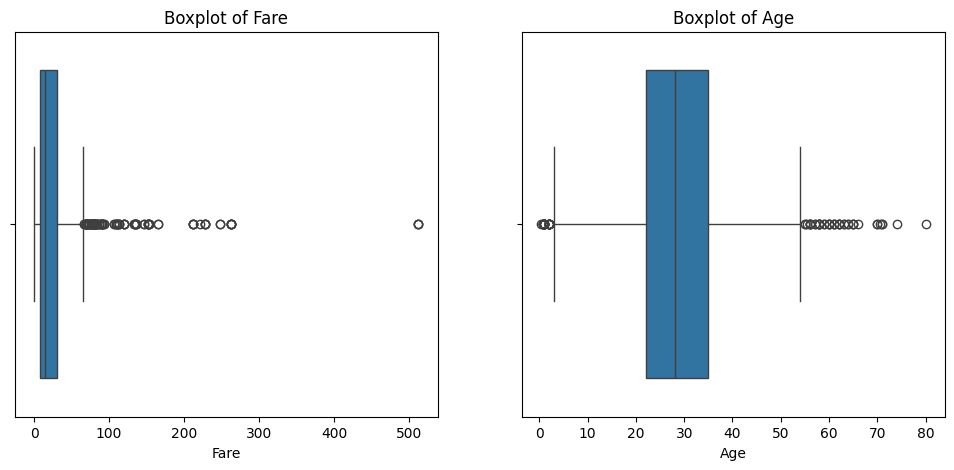


Original shape: (891, 9)
Shape after removing outliers from 'Fare': (775, 9)

 Final Cleaned and Preprocessed Data 
   Survived  Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_Q  \
0         0       3    0 -0.528321  0.625606 -0.433718 -0.779117       False   
2         1       3    1 -0.215182 -0.486423 -0.433718 -0.729373       False   
3         1       1    1  0.489381  0.625606 -0.433718  2.599828       False   
4         0       3    0  0.489381 -0.486423 -0.433718 -0.720161       False   
5         0       3    0 -0.058613 -0.486423 -0.433718 -0.690071        True   

   Embarked_S  
0        True  
2        True  
3        True  
4        True  
5       False  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Titanic-Dataset.csv')

print("Initial Data Information ")
print(df.info())
print("\n Head of the Dataset ")
print(df.head())

#  Handling Missing Values

df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop('Cabin', axis=1, inplace=True)

print("\n Missing Values after Imputation ")
print(df.isnull().sum())


df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

print("\n Data after Handling Categorical Features")
print(df.head())

#  Visualize and Handling Outliers
print("\n Outlier Visualization ")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='Fare', data=df, ax=axes[0])
axes[0].set_title('Boxplot of Fare')
sns.boxplot(x='Age', data=df, ax=axes[1])
axes[1].set_title('Boxplot of Age')
plt.show()


Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_cleaned = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print(f"\nOriginal shape: {df.shape}")
print(f"Shape after removing outliers from 'Fare': {df_cleaned.shape}")
df = df_cleaned


features_to_scale = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("\n Final Cleaned and Preprocessed Data ")
print(df.head())

